# Setup

In [ ]:
!pip install fastai==2.7.10
!pip install git+https://github.com/lessw2020/Ranger21.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lessw2020/Ranger21.git to /tmp/pip-req-build-tndye237
  Running command git clone -q https://github.com/lessw2020/Ranger21.git /tmp/pip-req-build-tndye237


# Processing training data

In [ ]:
from os import listdir

def remove_invalid(df):
    file_names = listdir('data/images')
    return df[df['image_id'].isin(file_names)]

In [ ]:
from fastai.vision.all import *
import pandas as pd

train_df = pd.read_csv('data/train.csv')
train_df = remove_invalid(train_df)


train_db = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                    splitter=TrainTestSplitter(),
                    get_x=ColReader(0, pref="data/images/"),
                    get_y=ColReader(1, label_delim=' '),
                    item_tfms=Resize(224),
                    batch_tfms=aug_transforms())
print(train_db)
print(train_df)
dls = train_db.dataloaders(train_df)

       image_id                 labels
0    img256.jpg    l16 l18 l23 l25 l73
1     img98.jpg         l0 l24 l26 l39
2    img147.jpg                 l14 l3
3    img254.jpg             l2 l25 l29
4    img160.jpg      l0 l32 l38 l40 l6
..          ...                    ...
200  img105.jpg                    l51
201  img198.jpg      l0 l10 l11 l65 l7
202   img82.jpg                     l2
203  img124.jpg   l0 l1 l19 l22 l34 l6
204   img23.jpg  l1 l15 l18 l2 l21 l71

[201 rows x 2 columns]


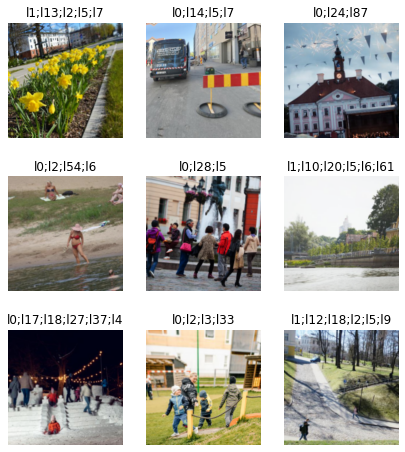

In [ ]:
dls.show_batch(max_n=9, figsize=(7,8))

# The good stuff

In [ ]:
# https://forums.fast.ai/t/what-s-your-go-to-optimizer-in-2021/87532/10
from ranger21 import Ranger21

def ranger21(params, lr, **kwargs):
    return OptimWrapper(params, Ranger21, lr=lr, 
                        num_epochs=10,
                        num_batches_per_epoch=len(dls.train),
                        **kwargs)

In [ ]:
from mxresnet import mxresnet34
learn = vision_learner(dls, mxresnet34, metrics=accuracy_multi, opt_func=ranger21, pretrained=False) # todo experiment with different models

In [ ]:
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.968424,0.640062,0.658006,02:08


error in warmdown pct calc.  new pct = 1.1428571428571428
auto handled but please report issue
error in warmdown - lr below min lr. current lr = 2.999999999999997e-05
auto handling but please report issue!
error in warmdown pct calc.  new pct = 1.1428571428571428
auto handled but please report issue
error in warmdown - lr below min lr. current lr = 2.999999999999997e-05
auto handling but please report issue!
error in warmdown pct calc.  new pct = 1.2857142857142858
auto handled but please report issue
error in warmdown - lr below min lr. current lr = 2.999999999999997e-05
auto handling but please report issue!
error in warmdown pct calc.  new pct = 1.2857142857142858
auto handled but please report issue
error in warmdown - lr below min lr. current lr = 2.999999999999997e-05
auto handling but please report issue!


In [82]:
test_df = pd.read_csv('data/test.csv')
print(test_df)

      image_id
0   img102.jpg
1   img103.jpg
2    img11.jpg
3   img113.jpg
4   img114.jpg
..         ...
83   img81.jpg
84   img84.jpg
85   img90.jpg
86   img93.jpg
87   img94.jpg

[88 rows x 1 columns]


image_id    img59.jpg
Name: 76, dtype: object


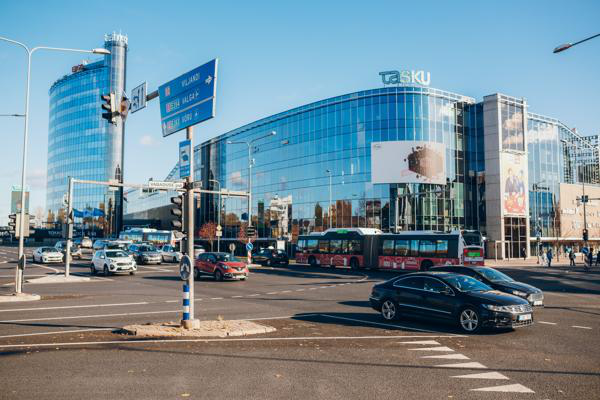

In [83]:
img_series = test_df.sample().iloc[0]
print(img_series)

img_path = 'data/images/' + img_series['image_id']

img = load_image(img_path)
img

In [84]:
pred_class,pred_idx,outputs = learn.predict(img_path)
pred_class

(#42) ['l12','l13','l15','l16','l17','l19','l23','l25','l26','l28'...]

In [85]:
file_names = listdir('data/images')
for i in test_df.index:
  if test_df.at[i, 'image_id'] in file_names:
    img_path = 'data/images/' + test_df.at[i, 'image_id']
    print(img_path)
    pred_class,pred_idx,outputs = learn.predict(img_path)
    print(pred_class)
    test_df.at[i, 'labels'] = ' '.join(pred_class)
  else:
    test_df.at[i, 'labels'] = ''
print(test_df)

data/images/img102.jpg


['l12', 'l13', 'l15', 'l17', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img103.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img11.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img113.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l90']
data/images/img114.jpg


['l13', 'l14', 'l16', 'l20', 'l25', 'l28', 'l29', 'l3', 'l33', 'l37', 'l43', 'l49', 'l51', 'l58', 'l60', 'l62', 'l65', 'l68', 'l7', 'l70', 'l73', 'l74', 'l8', 'l81', 'l83', 'l85', 'l86', 'l87', 'l89', 'l90', 'l91']
data/images/img121.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img126.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img131.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l45', 'l49', 'l51', 'l57', 'l58', 'l60', 'l62', 'l65', 'l66', 'l69', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90', 'l91']
data/images/img136.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img137.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img139.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img140.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img15.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img150.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img151.jpg


['l13', 'l15', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l49', 'l5', 'l51', 'l54', 'l58', 'l60', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img152.jpg


['l13', 'l15', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img156.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img161.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img166.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img167.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img170.jpg


['l12', 'l13', 'l15', 'l17', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img173.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img176.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img18.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img180.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img181.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img182.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img183.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l58', 'l62', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img189.jpg


['l13', 'l15', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l66', 'l7', 'l70', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90', 'l91']
data/images/img192.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img194.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img195.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l49', 'l51', 'l54', 'l57', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90', 'l91']
data/images/img206.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img208.jpg


['l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img209.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img211.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img212.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l90']
data/images/img218.jpg


['l0', 'l1', 'l12', 'l13', 'l14', 'l16', 'l2', 'l20', 'l25', 'l26', 'l28', 'l29', 'l3', 'l33', 'l34', 'l35', 'l37', 'l38', 'l41', 'l43', 'l46', 'l51', 'l54', 'l56', 'l58', 'l6', 'l60', 'l62', 'l69', 'l7', 'l72', 'l73', 'l74', 'l76', 'l77', 'l79', 'l8', 'l81', 'l82', 'l84', 'l85', 'l86', 'l87', 'l89', 'l90', 'l91']
data/images/img22.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img221.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img228.jpg


['l12', 'l13', 'l17', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l5', 'l51', 'l54', 'l58', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l90']
data/images/img230.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img231.jpg


['l12', 'l13', 'l15', 'l17', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l60', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l90']
data/images/img234.jpg


['l12', 'l13', 'l17', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img238.jpg


['l12', 'l13', 'l15', 'l17', 'l25', 'l26', 'l28', 'l37', 'l40', 'l42', 'l43', 'l46', 'l49', 'l51', 'l54', 'l56', 'l58', 'l6', 'l60', 'l66', 'l70', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l89', 'l9', 'l90', 'l91']
data/images/img243.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img247.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img248.jpg


['l12', 'l13', 'l17', 'l25', 'l27', 'l28', 'l29', 'l33', 'l37', 'l42', 'l45', 'l46', 'l49', 'l51', 'l58', 'l62', 'l66', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90', 'l91']
data/images/img249.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img250.jpg


['l12', 'l13', 'l15', 'l17', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img251.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img252.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img257.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img259.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img262.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img265.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img266.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img279.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img280.jpg


['l10', 'l12', 'l13', 'l15', 'l16', 'l17', 'l18', 'l19', 'l22', 'l24', 'l25', 'l26', 'l28', 'l36', 'l40', 'l42', 'l43', 'l46', 'l47', 'l49', 'l5', 'l51', 'l54', 'l55', 'l56', 'l6', 'l60', 'l66', 'l70', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l89', 'l9', 'l90', 'l91']
data/images/img281.jpg


['l0', 'l13', 'l15', 'l19', 'l23', 'l25', 'l26', 'l28', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l60', 'l65', 'l66', 'l7', 'l70', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l9', 'l90', 'l91']
data/images/img292.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img296.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img3.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l90']
data/images/img300.jpg


['l13', 'l14', 'l15', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l5', 'l51', 'l58', 'l60', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img33.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img37.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img39.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l35', 'l37', 'l42', 'l49', 'l5', 'l51', 'l54', 'l57', 'l58', 'l62', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img41.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img42.jpg


['l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img43.jpg


['l0', 'l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img48.jpg


['l12', 'l13', 'l15', 'l17', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img49.jpg


['l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img5.jpg


['l12', 'l13', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l90']
data/images/img57.jpg


['l13', 'l14', 'l15', 'l16', 'l20', 'l25', 'l28', 'l29', 'l33', 'l37', 'l41', 'l43', 'l46', 'l49', 'l51', 'l54', 'l58', 'l60', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l90', 'l91']
data/images/img59.jpg


['l12', 'l13', 'l15', 'l16', 'l17', 'l19', 'l23', 'l25', 'l26', 'l28', 'l33', 'l37', 'l4', 'l42', 'l43', 'l46', 'l49', 'l5', 'l51', 'l52', 'l54', 'l55', 'l56', 'l58', 'l6', 'l60', 'l65', 'l66', 'l7', 'l70', 'l71', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90', 'l91']
data/images/img69.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img71.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img73.jpg


['l0', 'l12', 'l13', 'l15', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img75.jpg


['l12', 'l13', 'l14', 'l15', 'l17', 'l19', 'l23', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l45', 'l46', 'l49', 'l5', 'l51', 'l54', 'l57', 'l58', 'l6', 'l60', 'l65', 'l66', 'l7', 'l70', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90', 'l91']
data/images/img79.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l46', 'l49', 'l51', 'l54', 'l58', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l9', 'l90']
data/images/img8.jpg


['l12', 'l13', 'l15', 'l17', 'l25', 'l27', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l49', 'l51', 'l54', 'l58', 'l60', 'l62', 'l65', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l83', 'l85', 'l87', 'l89', 'l90']
data/images/img81.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l29', 'l33', 'l37', 'l42', 'l43', 'l45', 'l49', 'l51', 'l54', 'l57', 'l58', 'l62', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l9', 'l90', 'l91']
data/images/img84.jpg


['l12', 'l13', 'l15', 'l19', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l49', 'l5', 'l51', 'l54', 'l58', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90']
data/images/img90.jpg


['l12', 'l13', 'l15', 'l17', 'l25', 'l28', 'l33', 'l37', 'l42', 'l43', 'l46', 'l49', 'l51', 'l54', 'l58', 'l66', 'l7', 'l73', 'l74', 'l75', 'l76', 'l82', 'l85', 'l87', 'l89', 'l9', 'l90', 'l91']
data/images/img93.jpg


['l0', 'l1', 'l12', 'l13', 'l14', 'l15', 'l16', 'l20', 'l25', 'l26', 'l28', 'l29', 'l3', 'l33', 'l35', 'l37', 'l43', 'l45', 'l46', 'l49', 'l5', 'l51', 'l54', 'l57', 'l58', 'l60', 'l62', 'l65', 'l66', 'l7', 'l72', 'l73', 'l74', 'l75', 'l82', 'l83', 'l84', 'l85', 'l86', 'l87', 'l89', 'l90', 'l91']
data/images/img94.jpg


['l12', 'l13', 'l15', 'l25', 'l27', 'l28', 'l29', 'l33', 'l37', 'l42', 'l49', 'l5', 'l51', 'l54', 'l57', 'l58', 'l65', 'l66', 'l7', 'l73', 'l74', 'l75', 'l82', 'l83', 'l85', 'l87', 'l89', 'l9', 'l90']
      image_id  \
0   img102.jpg   
1   img103.jpg   
2    img11.jpg   
3   img113.jpg   
4   img114.jpg   
..         ...   
83   img81.jpg   
84   img84.jpg   
85   img90.jpg   
86   img93.jpg   
87   img94.jpg   

                                                                                                                                                                    labels  
0                                                        l12 l13 l15 l17 l19 l25 l28 l33 l37 l42 l43 l49 l51 l54 l58 l62 l65 l66 l7 l73 l74 l75 l76 l82 l85 l87 l89 l9 l90  
1                                                    l12 l13 l15 l19 l25 l28 l29 l33 l37 l42 l43 l45 l46 l49 l51 l54 l58 l62 l65 l7 l73 l74 l75 l82 l83 l85 l87 l89 l9 l90  
2                                                            l1

In [86]:
test_df.to_csv('data/submission.csv', index = False)

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kristoisberg","key":"e896f3fc0e72d1ac41b5c41a2585a55a"}'}

In [ ]:
import json

!mkdir /root/.kaggle/
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [87]:
!kaggle competitions submit -c tartu-object-detection-part-2 -f data/submission.csv -m "FastAI v2 submission"

100% 10.8k/10.8k [00:01<00:00, 9.51kB/s]
Successfully submitted to Object recognition for The Image Bank of Tartu (2)